In [4]:
#notebook to figure out imputation strategy
#will modify the utils.py file to include the imputation strategy but let's see if we can get rid of specific samples first
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
os.chdir('/home/sarthak/cornell/Krumsiek')
from utils import LoadData

#load data
dataclass = LoadData(preprocess = False, impute = False)
m = dataclass.m
p = dataclass.p

In [3]:
print(p.shape)
#print the number of NAn values
print(np.sum(np.isnan(p)))

(27337, 1461)
1085219


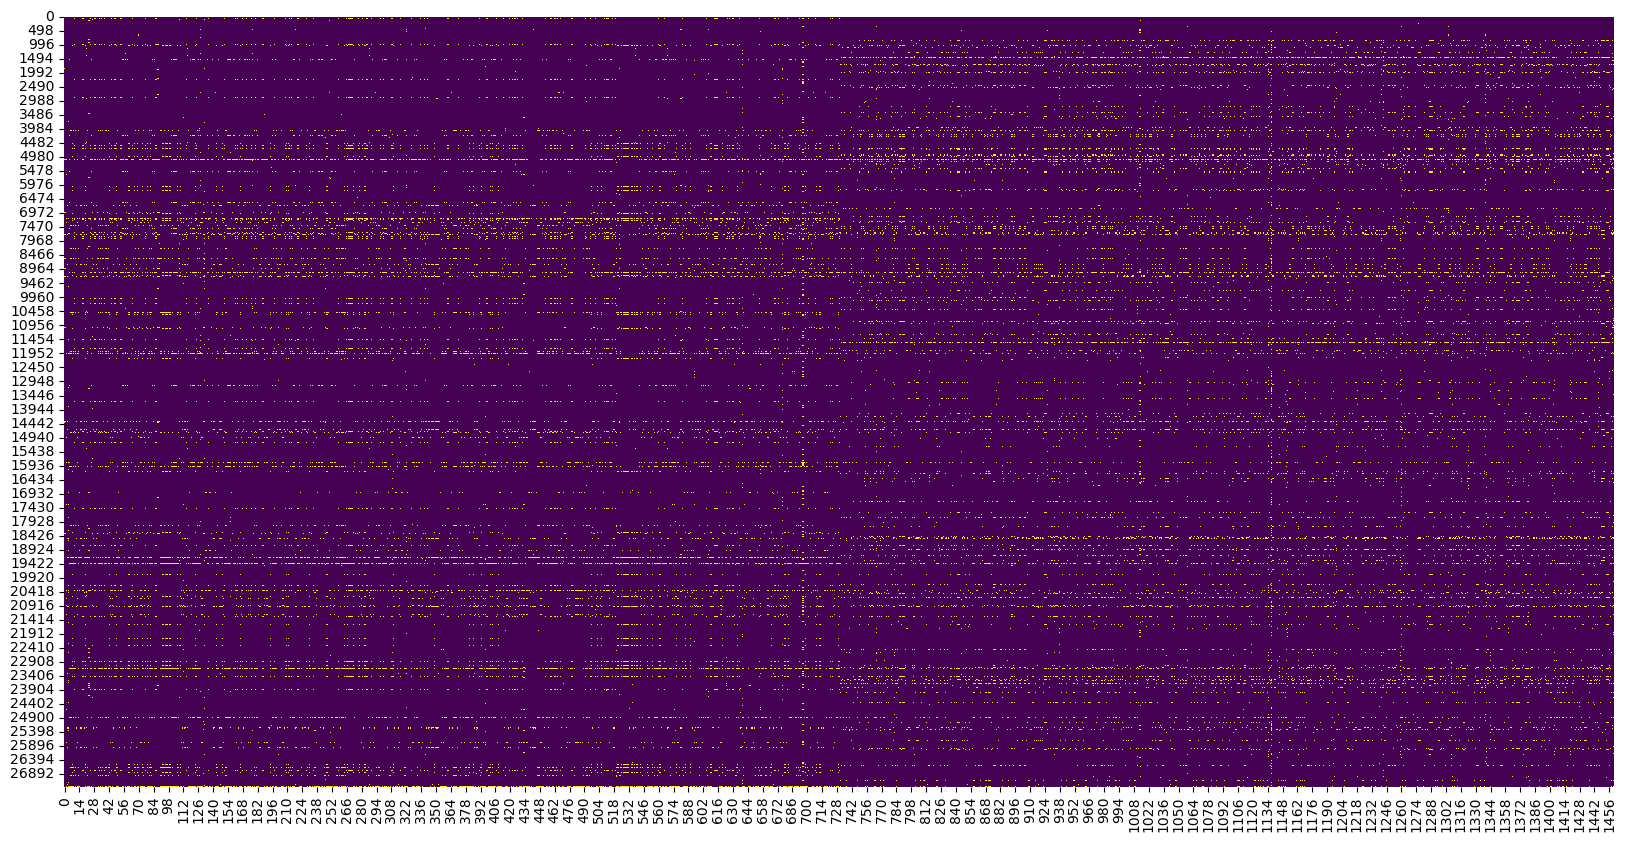

In [5]:
df = pd.DataFrame(p)

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

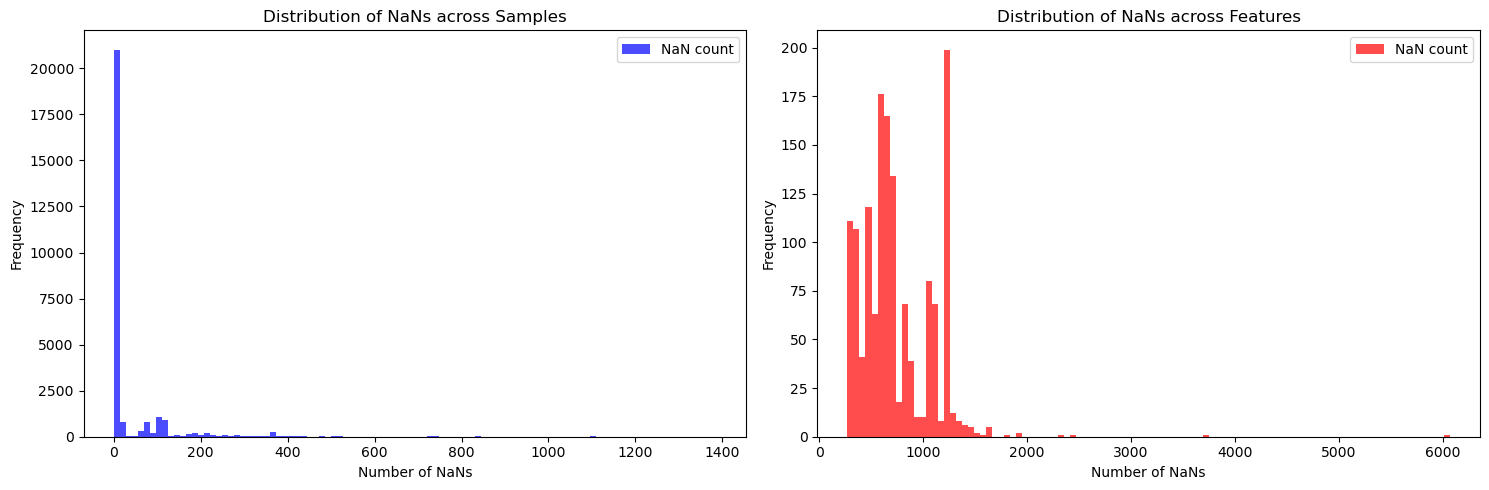

In [12]:
#histogram to visualize NaN data

nan_count_rows = df.isnull().sum(axis=1)
nan_count_columns = df.isnull().sum(axis=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for rows
axes[0].hist(nan_count_rows, bins=100, color='b', alpha=0.7, label='NaN count')
axes[0].set_title('Distribution of NaNs across Samples')
axes[0].set_xlabel('Number of NaNs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for columns
axes[1].hist(nan_count_columns, bins=100, color='r', alpha=0.7, label='NaN count')
axes[1].set_title('Distribution of NaNs across Features')
axes[1].set_xlabel('Number of NaNs')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

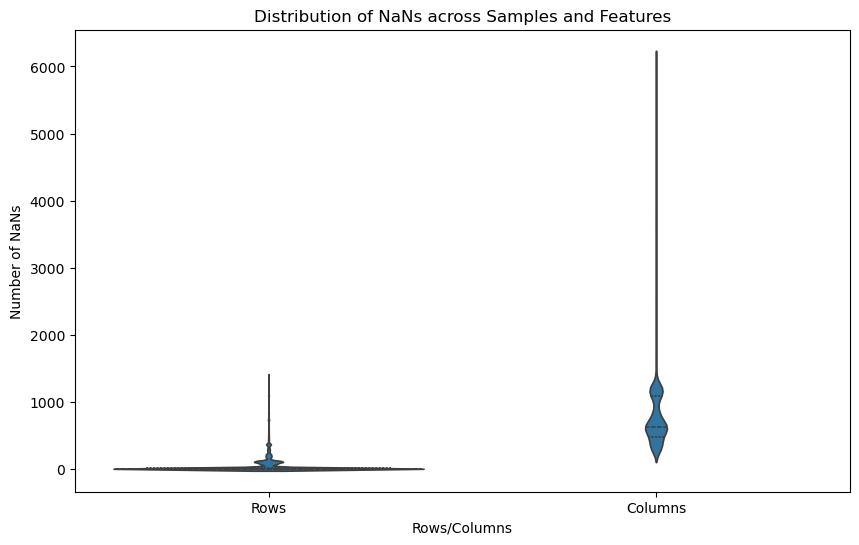

In [13]:
df_violin_rows = pd.DataFrame({'Type': 'Rows', 'NaN_Count': nan_count_rows})
df_violin_columns = pd.DataFrame({'Type': 'Columns', 'NaN_Count': nan_count_columns})
df_violin = pd.concat([df_violin_rows, df_violin_columns])

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='NaN_Count', data=df_violin, inner='quartile')
plt.title('Distribution of NaNs across Samples and Features')
plt.xlabel('Rows/Columns')
plt.ylabel('Number of NaNs')
plt.show()

(25818, 1461)


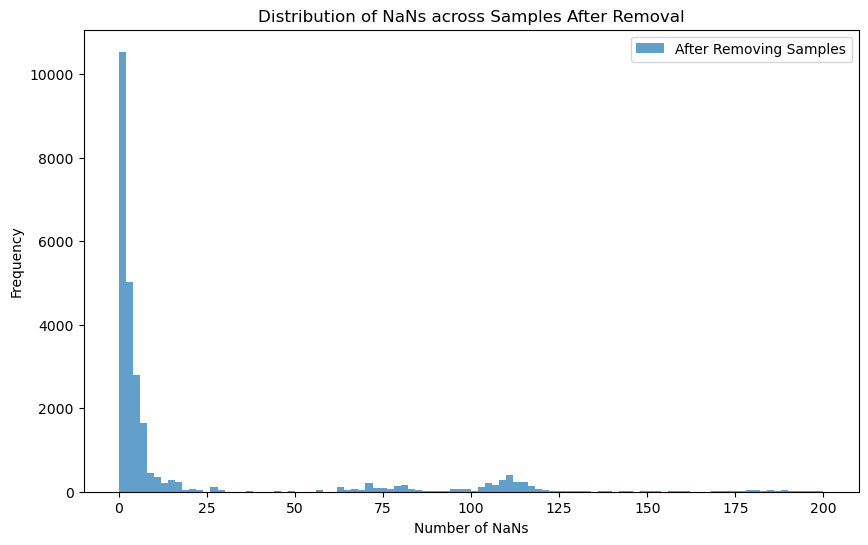

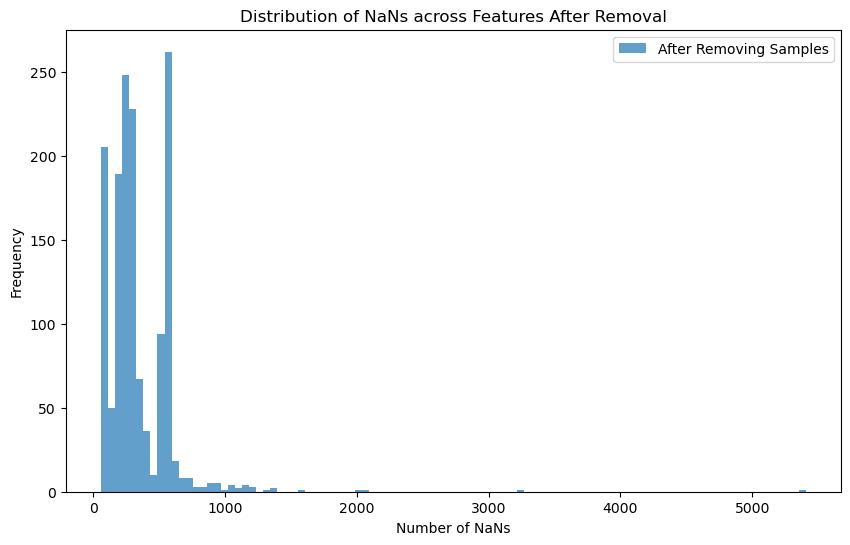

In [18]:
df_filtered = df[df.isnull().sum(axis=1) <= 200]
print(df_filtered.shape)

# Count the number of NaNs in each row of the filtered DataFrame
nan_count_rows_filtered = df_filtered.isnull().sum(axis=1)
nan_count_columns_filtered = df_filtered.isnull().sum(axis=0)

# Create a DataFrame for seaborn for the filtered data
df_violin_rows_filtered = pd.DataFrame({'Type': 'Rows', 'NaN_Count': nan_count_rows_filtered})

# Create the histogram for the filtered data
plt.figure(figsize=(10, 6))
plt.hist(nan_count_rows_filtered, bins=100, alpha=0.7, label='After Removing Samples')
plt.title('Distribution of NaNs across Samples After Removal')
plt.xlabel('Number of NaNs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nan_count_columns_filtered, bins=100, alpha=0.7, label='After Removing Samples')
plt.title('Distribution of NaNs across Features After Removal')
plt.xlabel('Number of NaNs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create the violin plot for the filtered data
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='Type', y='NaN_Count', data=df_violin_rows_filtered, inner='quartile')
# plt.title('Distribution of NaNs across Samples After Removal')
# plt.xlabel('Rows')
# plt.ylabel('Number of NaNs')
# plt.show()

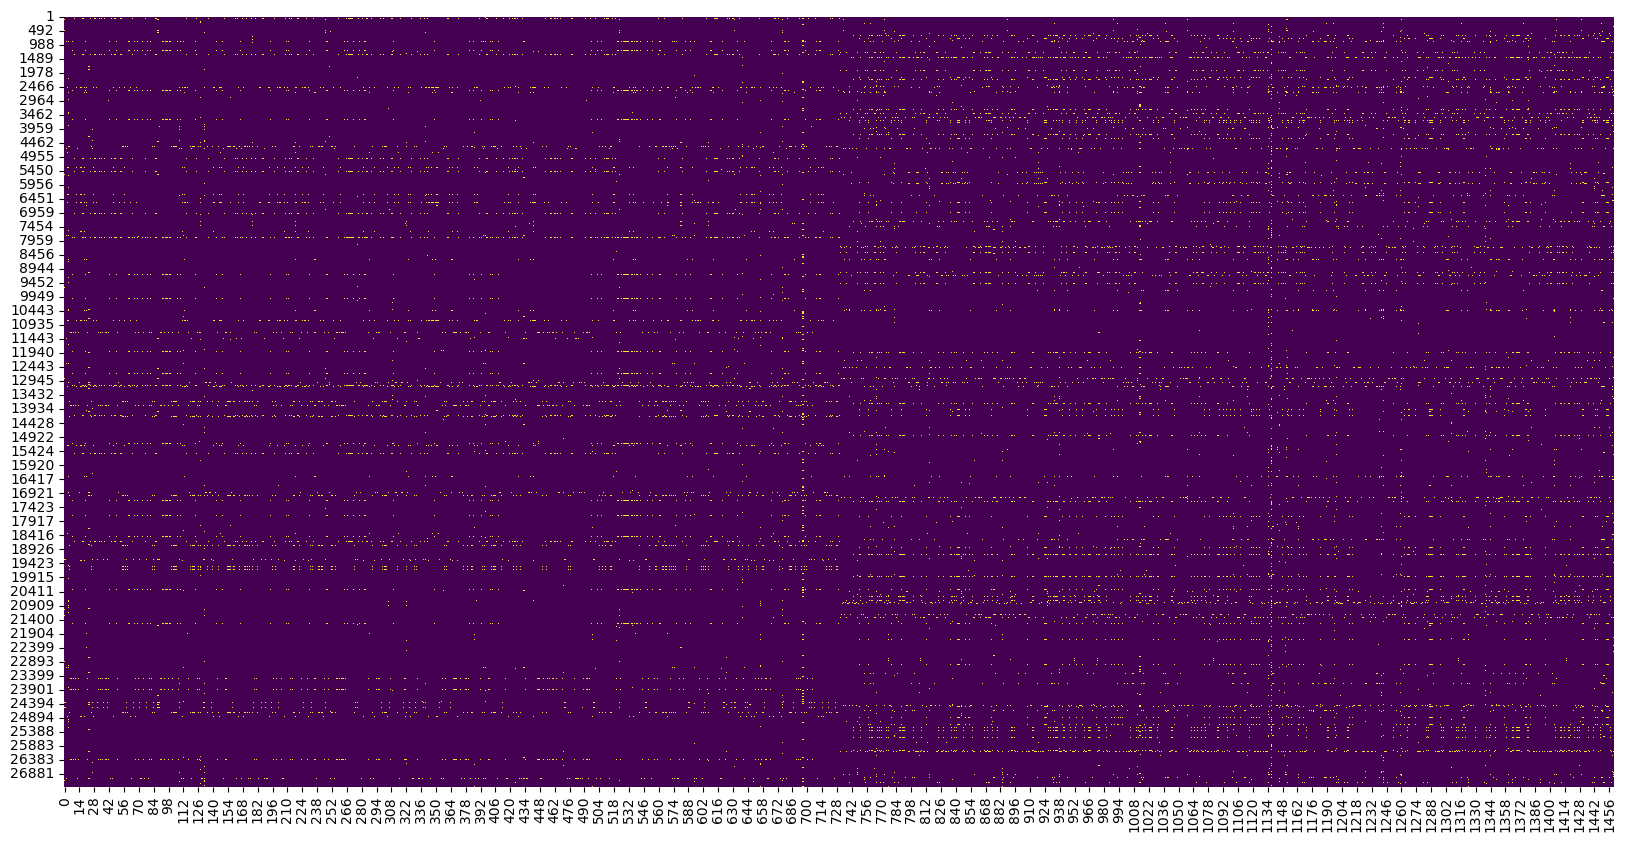

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df_filtered.isnull(), cbar=False, cmap='viridis')
plt.show()

(21893, 1461)


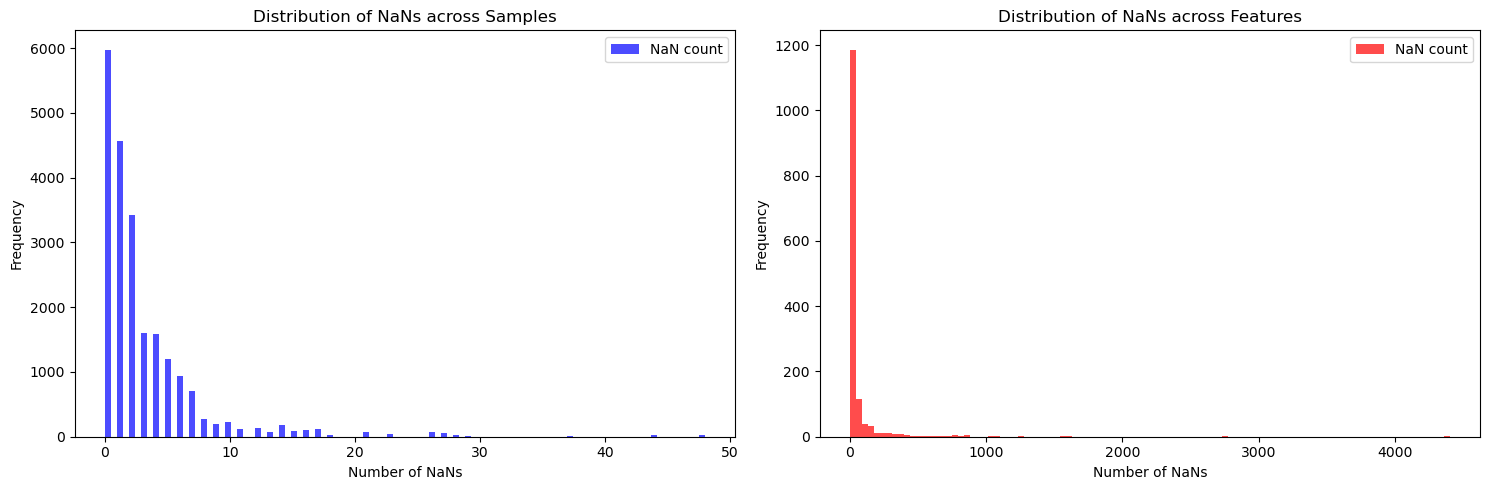

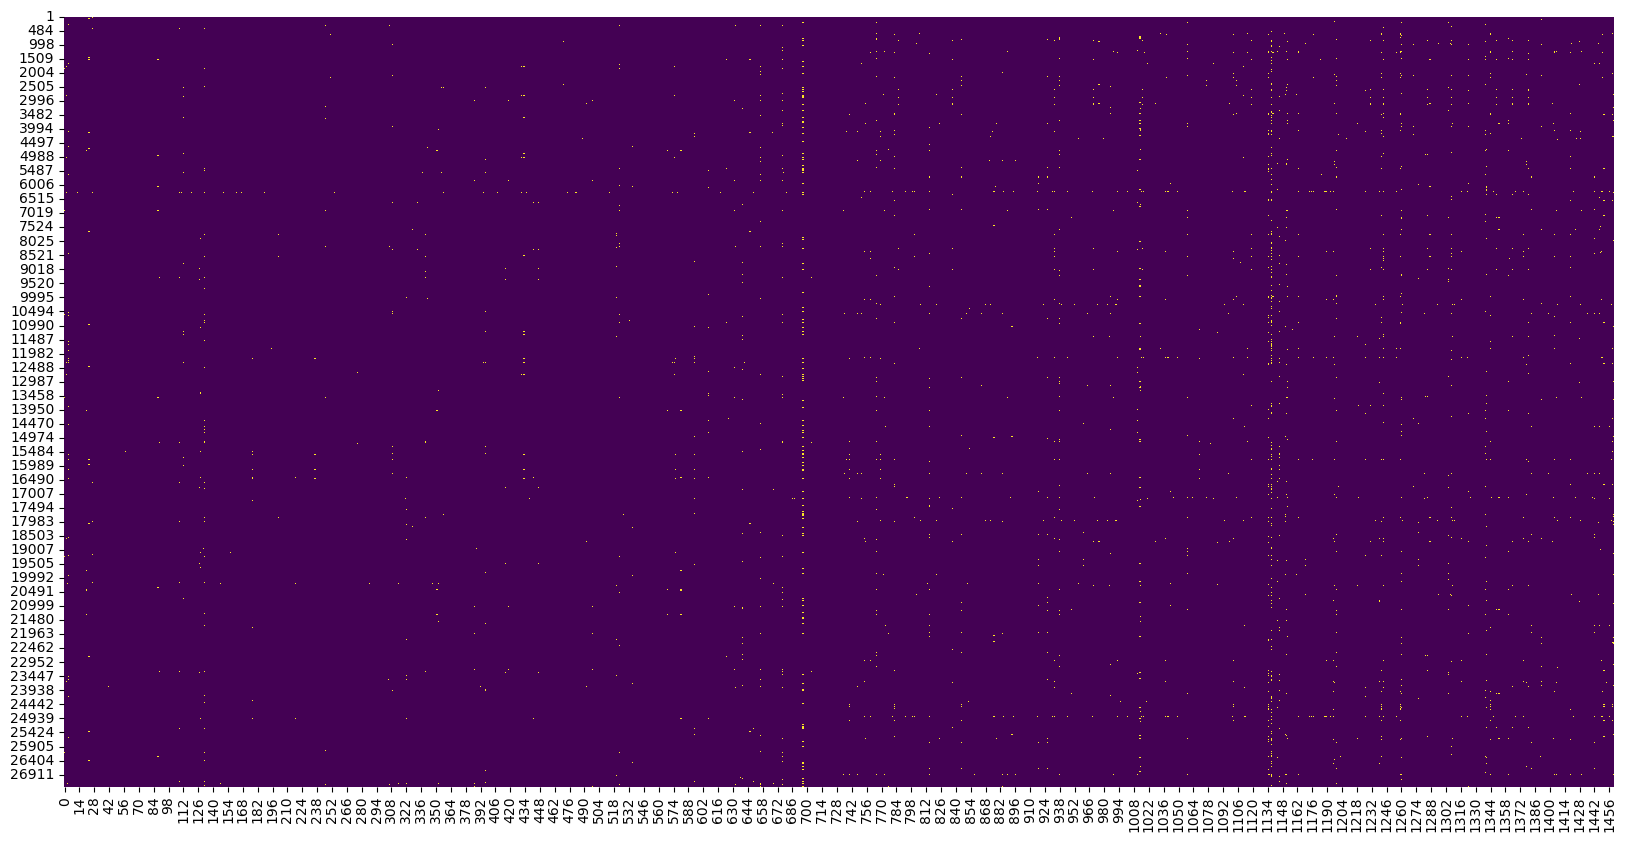

In [22]:
df_filtered = df[df.isnull().sum(axis=1) <= 50]
nan_count_rows_filtered = df_filtered.isnull().sum(axis=1)
nan_count_columns_filtered = df_filtered.isnull().sum(axis=0)
print(df_filtered.shape)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Histogram for rows
axes[0].hist(nan_count_rows_filtered, bins=100, color='b', alpha=0.7, label='NaN count')
axes[0].set_title('Distribution of NaNs across Samples')
axes[0].set_xlabel('Number of NaNs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for columns
axes[1].hist(nan_count_columns_filtered, bins=100, color='r', alpha=0.7, label='NaN count')
axes[1].set_title('Distribution of NaNs across Features')
axes[1].set_xlabel('Number of NaNs')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(df_filtered.isnull(), cbar=False, cmap='viridis')
plt.show()

(23304, 928)


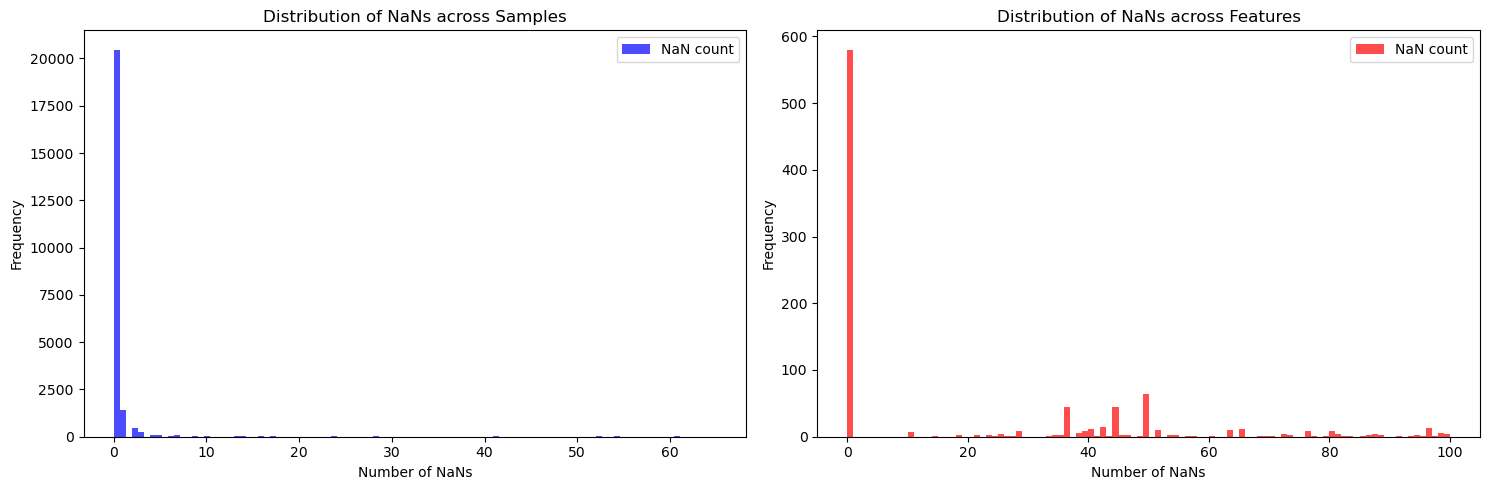

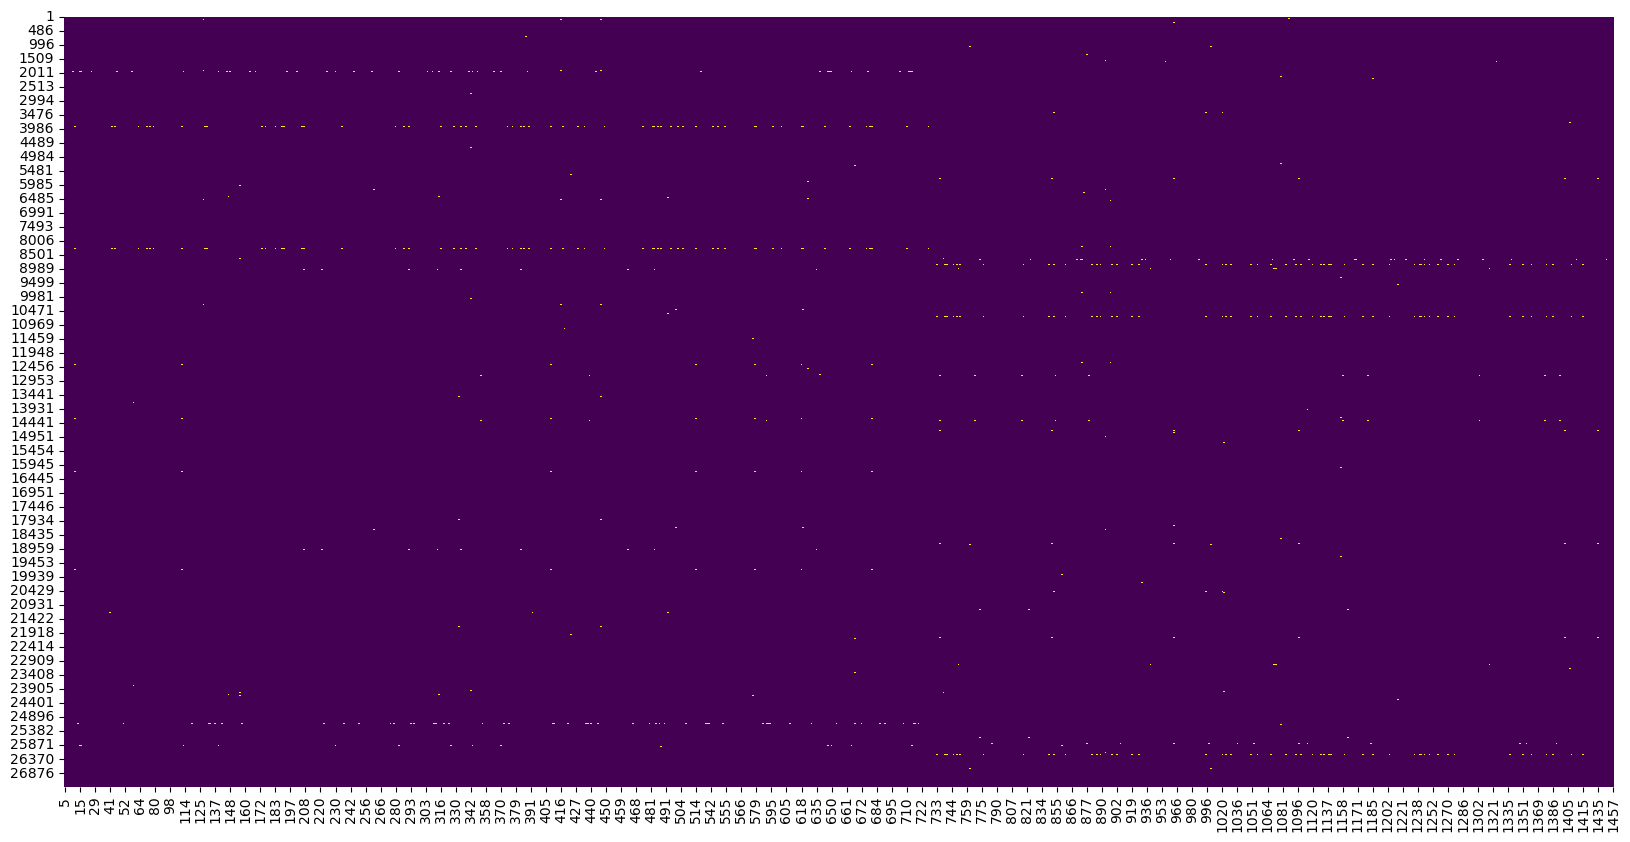

In [30]:
df_filtered = df[df.isnull().sum(axis=1) <= 100]

# Remove columns with more than 500 NaN values
df_filtered = df_filtered.loc[:, df_filtered.isnull().sum() <= 100]

nan_count_rows_filtered = df_filtered.isnull().sum(axis=1)
nan_count_columns_filtered = df_filtered.isnull().sum(axis=0)
print(df_filtered.shape)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Histogram for rows
axes[0].hist(nan_count_rows_filtered, bins=100, color='b', alpha=0.7, label='NaN count')
axes[0].set_title('Distribution of NaNs across Samples')
axes[0].set_xlabel('Number of NaNs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for columns
axes[1].hist(nan_count_columns_filtered, bins=100, color='r', alpha=0.7, label='NaN count')
axes[1].set_title('Distribution of NaNs across Features')
axes[1].set_xlabel('Number of NaNs')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(df_filtered.isnull(), cbar=False, cmap='viridis')
plt.show()

In [28]:
#nowo print number of NaNs total
df_filtered = df_filtered.to_numpy()
print(np.sum(np.isnan(df_filtered)))

147


In [32]:
#what if we just removed every row or column with an NA value
array = p

row_nan_count = np.isnan(array).sum(axis=1)
filtered_array_by_row = array[row_nan_count <= 10, :]

# Step 2: Remove columns with at least one NaN
col_nan_count = np.isnan(filtered_array_by_row).sum(axis=0)
filtered_array_by_row_and_col = filtered_array_by_row[:, col_nan_count <= 0]

print("Original array shape:", array.shape)
print("Array shape after removing rows:", filtered_array_by_row.shape)
print("Array shape after removing rows and columns:", filtered_array_by_row_and_col.shape)
print('number of NaNs in filtered array', np.sum(np.isnan(filtered_array_by_row_and_col)))

Original array shape: (27337, 1461)
Array shape after removing rows: (20687, 1461)
Array shape after removing rows and columns: (20687, 1202)
number of NaNs in filtered array 0


In [36]:
row_nan_count = np.isnan(array).sum(axis=1)
filtered_array_by_row = array[row_nan_count <= 20, :]

# Step 2: Remove columns with at least one NaN
col_nan_count = np.isnan(filtered_array_by_row).sum(axis=0)
filtered_array_by_row_and_col = filtered_array_by_row[:, col_nan_count <= 5]

print("Original array shape:", array.shape)
print("Array shape after removing rows:", filtered_array_by_row.shape)
print("Array shape after removing rows and columns:", filtered_array_by_row_and_col.shape)
print('number of NaNs in filtered array', np.sum(np.isnan(filtered_array_by_row_and_col)))

Original array shape: (27337, 1461)
Array shape after removing rows: (21551, 1461)
Array shape after removing rows and columns: (21551, 1150)
number of NaNs in filtered array 0


In [44]:
def filter_fct(array, row_threshold, col_threshold, print_shape = False):
    #this function does what I propose
    row_nan_count = np.isnan(array).sum(axis=1)
    filtered_array_by_row = array[row_nan_count <= row_threshold, :]
    
    col_nan_count = np.isnan(filtered_array_by_row).sum(axis=0)
    filtered_array_by_row_and_col = filtered_array_by_row[:, col_nan_count <= col_threshold]
    
    if print_shape:
        print("Original array shape:", array.shape)
        print("Array shape after removing both", filtered_array_by_row_and_col.shape)
        print('numer of NaNs in filtered array', np.sum(np.isnan(filtered_array_by_row_and_col)))
        print('\n')
    return filtered_array_by_row_and_col

a = filter_fct(p, 30, 10, print_shape=1)
a = filter_fct(p, 30, 5, print_shape=1)
a = filter_fct(p, 50, 20, print_shape=1)
a = filter_fct(p, 50, 10, print_shape=1)
a = filter_fct(p, 100, 50, 1)
a = filter_fct(p, 75, 50, 1)

Original array shape: (27337, 1461)
Array shape after removing both (21832, 1077)
numer of NaNs in filtered array 15


Original array shape: (27337, 1461)
Array shape after removing both (21832, 1075)
numer of NaNs in filtered array 0


Original array shape: (27337, 1461)
Array shape after removing both (21893, 1056)
numer of NaNs in filtered array 288


Original array shape: (27337, 1461)
Array shape after removing both (21893, 1046)
numer of NaNs in filtered array 137


Original array shape: (27337, 1461)
Array shape after removing both (23304, 815)
numer of NaNs in filtered array 9411


Original array shape: (27337, 1461)
Array shape after removing both (22577, 1025)
numer of NaNs in filtered array 9211




In [50]:
#let's do a sort of grid search to find the best parameters

#we will define loss as the negative of ratio of the rows * 10, the negative ratio of the columns * 10, and the number of NaNs / 1000

#a better idea is create a histogram that stores it, and can find the sweetspot, id how to plot it tho
#let's do a scatter plot colored by NaNs remaining

#first set up the loop
row_threshold = np.linspace(5, 1000, 100)
col_threshold = np.linspace(5, 200, 100)

#initialize lists
col_left = []
row_left = []
nan_left = []

#now loop through
for i in row_threshold:
    for j in col_threshold:
        a = filter_fct(p, i, j)
        row_left.append(a.shape[0])
        col_left.append(a.shape[1])
        nan_left.append(np.sum(np.isnan(a)))

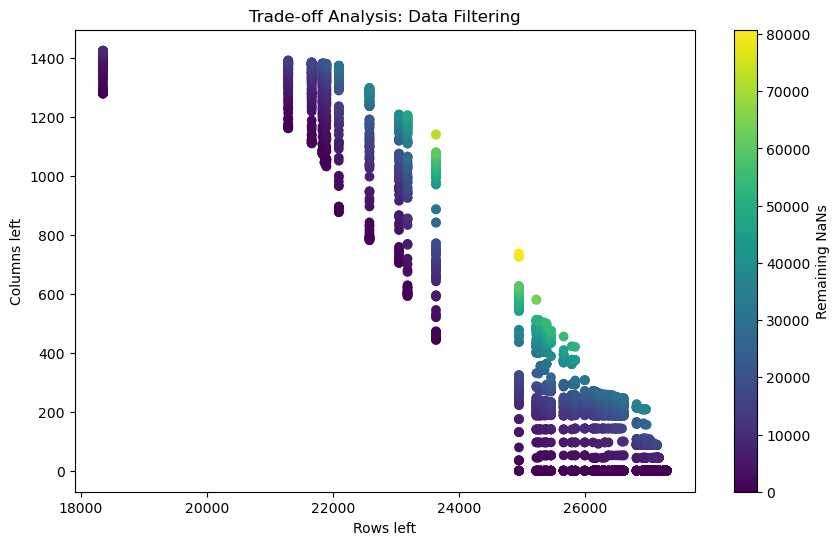

In [51]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(row_left, col_left, c=nan_left, cmap='viridis')
plt.colorbar(sc, label='Remaining NaNs')

# Label axes
plt.xlabel('Rows left')
plt.ylabel('Columns left')

# Add title
plt.title('Trade-off Analysis: Data Filtering')

plt.show()